# Purpose/Introduction

'''
The United States is currently undergoing a drug shortage, causing delays and discontinuations of treatment. 
The U.S. healthcare system is experiencing a strain on resources due to an aging population, and increased drug usage correlates with age. 
A model to predict drug demand based on population can forecast demand for future generations to mitigate supply chain bottlenecks. 
'''

In [1]:
## Import Libraries

import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Import Data

In [2]:
# Prescriptions dispensed 2009-2022
prescriptions_dispensed = pd.read_excel('./Total drug prescriptions dispensed in the U.S. 2009-2022.xlsx', sheet_name = 'Data')

# Prescription usage with age 1988-2018; percentages
prescription_usage_with_age = pd.read_excel('./Percentage of U.S. population with usage of prescription drugs within past month between 1988 and 2018 by age.xlsx', sheet_name = 'Data')

# Population data
us_population_2016 = pd.read_excel('./us_population_2016.xls')
us_population_2017 = pd.read_excel('./us_population_2017.xls')
us_population_2018 = pd.read_excel('./us_population_2018.xls')
us_population_2023 = pd.read_excel('./us_population_2023.xlsx')

In [3]:
# API data on drug shortage info couldn't be obtained due to data owner not responding to email

## Clean Data

In [4]:
# Check out column names, print the first few rows

In [5]:
print(prescriptions_dispensed.head())
print(prescriptions_dispensed.shape)

   Unnamed: 0                                         Unnamed: 1  Unnamed: 2
0         NaN                                                NaN         NaN
1         NaN  Total drug prescriptions dispensed in the U.S....         NaN
2         NaN  Total number of medical prescriptions dispense...         NaN
3         NaN                                                NaN         NaN
4         NaN                                              2009*      3953.0
(18, 3)


In [6]:
print(prescription_usage_with_age.head())
print(prescription_usage_with_age.shape)

   Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0         NaN                                                NaN        NaN   
1         NaN  U.S. population with usage of prescription dru...        NaN   
2         NaN  Percentage of U.S. population with usage of pr...        NaN   
3         NaN                                                NaN  1988-1994   
4         NaN                                     Under 18 years       20.5   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3  1999-2002  2011-2014  2015-2018        NaN  
4       23.8       21.5       21.5       in %  
(8, 7)


In [7]:
print(us_population_2016) # printing everything to see format; format of this sheet will match sheets of other years
print(us_population_2016.shape)

   table with row headers in column A and column headers in rows 5 and 6. Leading dots indicate subparts.  \
0            Table 1. Population by Age and Sex: 2016                                                       
1   (Numbers in thousands. Civilian noninstitution...                                                       
2                                                 NaN                                                       
3                                                 Age                                                       
4                                                 NaN                                                       
5                                            All ages                                                       
6                                      .Under 5 years                                                       
7                                       .5 to 9 years                                                       
8                  

In [8]:
print(us_population_2017.head())
print(us_population_2017.shape)

  table with row headers in column A and column headers in rows 5 and 6. Leading dots indicate subparts.  \
0           Table 1. Population by Age and Sex: 2017                                                       
1  (Numbers in thousands. Civilian noninstitution...                                                       
2                                                NaN                                                       
3                                                Age                                                       
4                                                NaN                                                       

   Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  
0         NaN        NaN        NaN        NaN        NaN        NaN  
1         NaN        NaN        NaN        NaN        NaN        NaN  
2         NaN        NaN        NaN        NaN        NaN        NaN  
3  Both sexes        NaN       Male        NaN     Female        Na

In [9]:
print(us_population_2018.head())
print(us_population_2018.shape)

  table with row headers in column A and column headers in rows 5 and 6. Leading dots indicate subparts.  \
0           Table 1. Population by Age and Sex: 2018                                                       
1  (Numbers in thousands. Civilian noninstitution...                                                       
2                                                NaN                                                       
3                                                Age                                                       
4                                                NaN                                                       

   Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  
0         NaN        NaN        NaN        NaN        NaN        NaN  
1         NaN        NaN        NaN        NaN        NaN        NaN  
2         NaN        NaN        NaN        NaN        NaN        NaN  
3  Both sexes        NaN       Male        NaN     Female        Na

In [10]:
print(us_population_2023)
print(us_population_2023.shape)

   Table with row headers in column A and column headers in rows 5 and 6. Leading dots indicate subparts.  \
0            Table 1. Population by Age and Sex: 2023                                                       
1   (Numbers in thousands. Civilian noninstitution...                                                       
2                                                 NaN                                                       
3                                                 Age                                                       
4                                                 NaN                                                       
5                                            All ages                                                       
6                                      .Under 5 years                                                       
7                                       .5 to 9 years                                                       
8                  

### Trim Dataframes

In [11]:
# Drop rows/columns
prescriptions_dispensed = prescriptions_dispensed.drop('Unnamed: 0', axis = 1)
prescriptions_dispensed = prescriptions_dispensed.drop(index = [0,1,2,3], axis = 0)

# Reset index
prescriptions_dispensed.reset_index(drop = True, inplace = True)

# Rename columns
prescriptions_dispensed.rename(columns = {'Unnamed: 1':'Year', 'Unnamed: 2':'Amount (millions)'}, inplace = True)

# Remove * symbols
prescriptions_dispensed['Year'] = prescriptions_dispensed['Year'].str.replace('*','')

print(prescriptions_dispensed)
print(prescriptions_dispensed.shape)

    Year  Amount (millions)
0   2009             3953.0
1   2010             3990.0
2   2011             4014.0
3   2012             4154.0
4   2013             4235.0
5   2014             4325.0
6   2015             4368.0
7   2016             5821.0
8   2017             5922.0
9   2018             6077.0
10  2019             6218.0
11  2020             6324.0
12  2021             6475.0
13  2022             6707.0
(14, 2)


In [12]:
# Drop rows/columns
prescription_usage_with_age = prescription_usage_with_age.drop('Unnamed: 0', axis = 1)
prescription_usage_with_age = prescription_usage_with_age.drop('Unnamed: 6', axis = 1)
prescription_usage_with_age = prescription_usage_with_age.drop(index = [0,1,2], axis = 0)

# Reset index
prescription_usage_with_age.reset_index(drop = True, inplace = True)

# Rename columns
prescription_usage_with_age.iloc[0,0] = 'Age'
prescription_usage_with_age.columns = prescription_usage_with_age.iloc[0]

prescription_usage_with_age = prescription_usage_with_age.drop(index = 0, axis = 0)

print(prescription_usage_with_age)
print(prescription_usage_with_age.shape)

0                Age 1988-1994 1999-2002 2011-2014 2015-2018
1     Under 18 years      20.5      23.8      21.5      21.5
2        18-44 years      31.3      35.9      37.1      35.7
3        45-64 years      54.8      64.1        69      67.1
4  65 years and over      73.6      84.7      90.6      88.5
(4, 5)


In [13]:
# Data to drop from population sheets

list1 = list(range(5,25))
list2 = list(range(31,41))
list3 = list(range(31,53))

In [14]:
# Drop blank rows/columns
us_population_2016 = us_population_2016.drop(index = [1,2], axis = 0)

# Drop data not in age brackets matching prescription data
us_population_2016 = us_population_2016.drop(index = list1, axis = 0)
us_population_2016 = us_population_2016.drop(index = list2, axis = 0)

# Reset index
us_population_2016.reset_index(drop = True, inplace = True)

# Rename columns
us_population_2016.iloc[1,1] = 'Both sexes (number)'
us_population_2016.iloc[1,2] = 'Both sexes (percent)'
us_population_2016.iloc[1,3] = 'Male (number)'
us_population_2016.iloc[1,4] = 'Male (percent)'
us_population_2016.iloc[1,5] = 'Female (number)'
us_population_2016.iloc[1,6] = 'Female (percent)'
us_population_2016.iloc[2,0] = ''
us_population_2016 = us_population_2016.drop(index = [0], axis = 0)
us_population_2016.reset_index(drop = True, inplace = True)
us_population_2016.columns = us_population_2016.iloc[0]

us_population_2016 = us_population_2016.drop(index = [0,1], axis = 0)
us_population_2016['Age'] = us_population_2016['Age'].str.replace('.','')

print(us_population_2016)
print(us_population_2016.shape)

0                   Age Both sexes (number) Both sexes (percent)  \
2        Under 15 years               60965                 19.1   
3        15 to 17 years               13097                  4.1   
4        18 to 20 years               12354                  3.9   
5        21 to 44 years              101205                 31.7   
6        45 to 64 years               83701                 26.2   
7     65 years and over               47547                 14.9   

0 Male (number) Male (percent) Female (number) Female (percent)  
2         31114           19.9           29851             18.4  
3          6624            4.2            6473                4  
4          6368            4.1            5985              3.7  
5         50272           32.2           50934             31.3  
6         40618             26           43083             26.5  
7         21209           13.6           26337             16.2  
(6, 7)


In [15]:
# Drop blank rows/columns
us_population_2017 = us_population_2017.drop(index = [1,2], axis = 0)

# Drop data not in age brackets matching prescription data
us_population_2017 = us_population_2017.drop(index = list1, axis = 0)
us_population_2017 = us_population_2017.drop(index = list2, axis = 0)

# Reset index
us_population_2017.reset_index(drop = True, inplace = True)

# Rename columns
us_population_2017.iloc[1,1] = 'Both sexes (number)'
us_population_2017.iloc[1,2] = 'Both sexes (percent)'
us_population_2017.iloc[1,3] = 'Male (number)'
us_population_2017.iloc[1,4] = 'Male (percent)'
us_population_2017.iloc[1,5] = 'Female (number)'
us_population_2017.iloc[1,6] = 'Female (percent)'
us_population_2017.iloc[2,0] = ''
us_population_2017 = us_population_2017.drop(index = [0], axis = 0)
us_population_2017.reset_index(drop = True, inplace = True)
us_population_2017.columns = us_population_2017.iloc[0]

us_population_2017 = us_population_2017.drop(index = [0,1], axis = 0)
us_population_2017['Age'] = us_population_2017['Age'].str.replace('.','')

print(us_population_2017)
print(us_population_2017.shape)

0                   Age Both sexes (number) Both sexes (percent)  \
2        Under 15 years               60969                   19   
3        15 to 17 years               13078                  4.1   
4        18 to 20 years               11983                  3.7   
5        21 to 44 years              101718                 31.7   
6        45 to 64 years               83351                   26   
7     65 years and over               49274                 15.4   

0 Male (number) Male (percent) Female (number) Female (percent)  
2         31127           19.8           29842             18.3  
3          6642            4.2            6436              3.9  
4          6131            3.9            5852              3.6  
5         50570           32.2           51147             31.3  
6         40308           25.7           43042             26.3  
7         22160           14.1           27114             16.6  
(6, 7)


In [16]:
# Drop blank rows/columns
us_population_2018 = us_population_2018.drop(index = [1,2], axis = 0)

# Drop data not in age brackets matching prescription data
us_population_2018 = us_population_2018.drop(index = list1, axis = 0)
us_population_2018 = us_population_2018.drop(index = list2, axis = 0)

# Reset index
us_population_2018.reset_index(drop = True, inplace = True)

# Rename columns
us_population_2018.iloc[1,1] = 'Both sexes (number)'
us_population_2018.iloc[1,2] = 'Both sexes (percent)'
us_population_2018.iloc[1,3] = 'Male (number)'
us_population_2018.iloc[1,4] = 'Male (percent)'
us_population_2018.iloc[1,5] = 'Female (number)'
us_population_2018.iloc[1,6] = 'Female (percent)'
us_population_2018.iloc[2,0] = ''
us_population_2018 = us_population_2018.drop(index = [0], axis = 0)
us_population_2018.reset_index(drop = True, inplace = True)
us_population_2018.columns = us_population_2018.iloc[0]

us_population_2018 = us_population_2018.drop(index = [0,1], axis = 0)
us_population_2018['Age'] = us_population_2018['Age'].str.replace('.','')

print(us_population_2018)
print(us_population_2018.shape)

0                   Age Both sexes (number) Both sexes (percent)  \
2        Under 15 years               60984                 18.9   
3        15 to 17 years               12979                    4   
4        18 to 20 years               12243                  3.8   
5        21 to 44 years              102633                 31.8   
6        45 to 64 years               83237                 25.8   
7     65 years and over               51080                 15.8   

0 Male (number) Male (percent) Female (number) Female (percent)  
2         31138           19.7           29846             18.1  
3          6582            4.2            6397              3.9  
4          6248            3.9            5996              3.6  
5         51157           32.3           51476             31.2  
6         40242           25.4           42995             26.1  
7         23059           14.6           28021               17  
(6, 7)


In [17]:
# Drop blank rows/columns
us_population_2023 = us_population_2023.drop(index = [0,1,2], axis = 0)

# Drop data not in age brackets matching prescription data
us_population_2023 = us_population_2023.drop(index = list1, axis = 0)
us_population_2023 = us_population_2023.drop(index = list3, axis = 0)

# Reset index
us_population_2023.reset_index(drop = True, inplace = True)

# Rename columns
us_population_2023.iloc[1,0] = 'Age'
us_population_2023.iloc[1,1] = 'Both sexes (number)'
us_population_2023.iloc[1,2] = 'Both sexes (percent)'
us_population_2023.iloc[1,3] = 'Male (number)'
us_population_2023.iloc[1,4] = 'Male (percent)'
us_population_2023.iloc[1,5] = 'Female (number)'
us_population_2023.iloc[1,6] = 'Female (percent)'
us_population_2023 = us_population_2023.drop(index = [0], axis = 0)
us_population_2023.reset_index(drop = True, inplace = True)
us_population_2023.columns = us_population_2023.iloc[0]

us_population_2023 = us_population_2023.drop(index = [0], axis = 0)
us_population_2023['Age'] = us_population_2023['Age'].str.replace('.','')

print(us_population_2023)
print(us_population_2023.shape)

0                   Age Both sexes (number) Both sexes (percent)  \
1        Under 15 years               59101                 17.9   
2        15 to 17 years               13399                  4.1   
3        18 to 20 years               12601                  3.8   
4        21 to 44 years              106258                 32.1   
5        45 to 64 years               81389                 24.6   
6     65 years and over               57884                 17.5   

0 Male (number) Male (percent) Female (number) Female (percent)  
1         30252           18.5           28849             17.3  
2          6725            4.1            6675                4  
3          6579              4            6022              3.6  
4         53410           32.7           52847             31.6  
5         40131           24.6           41258             24.7  
6         26303           16.1           31581             18.9  
(6, 7)


## Check Data Types

### Data must be in numeric format; look for missing values; all must be removed for Machine Learning to work

In [18]:
print(prescriptions_dispensed.info())

# Change type
prescriptions_dispensed['Year'] = pd.to_datetime(prescriptions_dispensed['Year'])

print(prescriptions_dispensed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               14 non-null     object 
 1   Amount (millions)  14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 356.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               14 non-null     datetime64[ns]
 1   Amount (millions)  14 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 356.0 bytes
None


In [19]:
print(prescription_usage_with_age.info())

# Change type
prescription_usage_with_age['1988-1994'] = prescription_usage_with_age['1988-1994'].astype(float)
prescription_usage_with_age['1999-2002'] = prescription_usage_with_age['1999-2002'].astype(float)
prescription_usage_with_age['2011-2014'] = prescription_usage_with_age['2011-2014'].astype(float)
prescription_usage_with_age['2015-2018'] = prescription_usage_with_age['2015-2018'].astype(float)

print(prescription_usage_with_age.info())
print(prescription_usage_with_age.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 1 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        4 non-null      object
 1   1988-1994  4 non-null      object
 2   1999-2002  4 non-null      object
 3   2011-2014  4 non-null      object
 4   2015-2018  4 non-null      object
dtypes: object(5)
memory usage: 292.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 1 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        4 non-null      object 
 1   1988-1994  4 non-null      float64
 2   1999-2002  4 non-null      float64
 3   2011-2014  4 non-null      float64
 4   2015-2018  4 non-null      float64
dtypes: float64(4), object(1)
memory usage: 292.0+ bytes
None
(4, 5)


In [20]:
print(us_population_2016.info())

# Change type
us_population_2016['Both sexes (number)'] = us_population_2016['Both sexes (number)'].astype(int)
us_population_2016['Both sexes (percent)'] = us_population_2016['Both sexes (percent)'].astype(float)
us_population_2016['Male (number)'] = us_population_2016['Male (number)'].astype(int) 
us_population_2016['Male (percent)'] = us_population_2016['Male (percent)'].astype(float) 
us_population_2016['Female (number)'] = us_population_2016['Female (number)'].astype(int) 
us_population_2016['Female (percent)'] = us_population_2016['Female (percent)'].astype(float) 

print(us_population_2016.info())
print(us_population_2016.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 2 to 7
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   6 non-null      object
 1   Both sexes (number)   6 non-null      object
 2   Both sexes (percent)  6 non-null      object
 3   Male (number)         6 non-null      object
 4   Male (percent)        6 non-null      object
 5   Female (number)       6 non-null      object
 6   Female (percent)      6 non-null      object
dtypes: object(7)
memory usage: 468.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 2 to 7
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   6 non-null      object 
 1   Both sexes (number)   6 non-null      int32  
 2   Both sexes (percent)  6 non-null      float64
 3   Male (number)         6 non-null      in

In [21]:
print(us_population_2017.info())

# Change type
us_population_2017['Both sexes (number)'] = us_population_2017['Both sexes (number)'].astype(int)
us_population_2017['Both sexes (percent)'] = us_population_2017['Both sexes (percent)'].astype(float)
us_population_2017['Male (number)'] = us_population_2017['Male (number)'].astype(int) 
us_population_2017['Male (percent)'] = us_population_2017['Male (percent)'].astype(float) 
us_population_2017['Female (number)'] = us_population_2017['Female (number)'].astype(int) 
us_population_2017['Female (percent)'] = us_population_2017['Female (percent)'].astype(float) 

print(us_population_2017.info())
print(us_population_2017.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 2 to 7
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   6 non-null      object
 1   Both sexes (number)   6 non-null      object
 2   Both sexes (percent)  6 non-null      object
 3   Male (number)         6 non-null      object
 4   Male (percent)        6 non-null      object
 5   Female (number)       6 non-null      object
 6   Female (percent)      6 non-null      object
dtypes: object(7)
memory usage: 468.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 2 to 7
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   6 non-null      object 
 1   Both sexes (number)   6 non-null      int32  
 2   Both sexes (percent)  6 non-null      float64
 3   Male (number)         6 non-null      in

In [22]:
print(us_population_2018.info())

# Change type
us_population_2018['Both sexes (number)'] = us_population_2018['Both sexes (number)'].astype(int)
us_population_2018['Both sexes (percent)'] = us_population_2018['Both sexes (percent)'].astype(float)
us_population_2018['Male (number)'] = us_population_2018['Male (number)'].astype(int) 
us_population_2018['Male (percent)'] = us_population_2018['Male (percent)'].astype(float) 
us_population_2018['Female (number)'] = us_population_2018['Female (number)'].astype(int) 
us_population_2018['Female (percent)'] = us_population_2018['Female (percent)'].astype(float) 

print(us_population_2018.info())
print(us_population_2018.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 2 to 7
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   6 non-null      object
 1   Both sexes (number)   6 non-null      object
 2   Both sexes (percent)  6 non-null      object
 3   Male (number)         6 non-null      object
 4   Male (percent)        6 non-null      object
 5   Female (number)       6 non-null      object
 6   Female (percent)      6 non-null      object
dtypes: object(7)
memory usage: 468.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 2 to 7
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   6 non-null      object 
 1   Both sexes (number)   6 non-null      int32  
 2   Both sexes (percent)  6 non-null      float64
 3   Male (number)         6 non-null      in

In [23]:
print(us_population_2023.info())

# Change type
us_population_2023['Both sexes (number)'] = us_population_2023['Both sexes (number)'].astype(int)
us_population_2023['Both sexes (percent)'] = us_population_2023['Both sexes (percent)'].astype(float)
us_population_2023['Male (number)'] = us_population_2023['Male (number)'].astype(int) 
us_population_2023['Male (percent)'] = us_population_2023['Male (percent)'].astype(float) 
us_population_2023['Female (number)'] = us_population_2023['Female (number)'].astype(int) 
us_population_2023['Female (percent)'] = us_population_2023['Female (percent)'].astype(float) 

print(us_population_2023.info())
print(us_population_2023.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 1 to 6
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   6 non-null      object
 1   Both sexes (number)   6 non-null      object
 2   Both sexes (percent)  6 non-null      object
 3   Male (number)         6 non-null      object
 4   Male (percent)        6 non-null      object
 5   Female (number)       6 non-null      object
 6   Female (percent)      6 non-null      object
dtypes: object(7)
memory usage: 468.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 1 to 6
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   6 non-null      object 
 1   Both sexes (number)   6 non-null      int32  
 2   Both sexes (percent)  6 non-null      float64
 3   Male (number)         6 non-null      in

## Check Time Ranges of Data

In [24]:
# prescriptions_dispensed

#2009-2022
print(min(prescriptions_dispensed['Year']))
print(max(prescriptions_dispensed['Year']))

# change in data collection method from 2016 onwards

2009-01-01 00:00:00
2022-01-01 00:00:00


In [25]:
# prescription_usage_with_age

# 1988-2018; gap from 2003-2011

In [26]:
# us_population

# original dataset chosen only contained 2023 data. New data was imported to account for the overlapping time range in the other two sheets (2016-2018)

## Select Data of Interest

### Filter by date to 2016-2018

In [27]:
prescriptions_dispensed = prescriptions_dispensed[(prescriptions_dispensed['Year'] >= '2016') & (prescriptions_dispensed['Year'] <= '2018')]

print(prescriptions_dispensed)

        Year  Amount (millions)
7 2016-01-01             5821.0
8 2017-01-01             5922.0
9 2018-01-01             6077.0


In [28]:
prescription_usage_with_age = prescription_usage_with_age[['Age', '2015-2018']]

print(prescription_usage_with_age)

0                Age  2015-2018
1     Under 18 years       21.5
2        18-44 years       35.7
3        45-64 years       67.1
4  65 years and over       88.5


In [29]:
us_population_2016['Year'] = '2016'
us_population_2017['Year'] = '2017'
us_population_2018['Year'] = '2018'
us_population_2023['Year'] = '2023'

us_population = pd.concat([us_population_2016, us_population_2017, us_population_2018], ignore_index = True)
print(us_population)

0                    Age  Both sexes (number)  Both sexes (percent)  \
0         Under 15 years                60965                  19.1   
1         15 to 17 years                13097                   4.1   
2         18 to 20 years                12354                   3.9   
3         21 to 44 years               101205                  31.7   
4         45 to 64 years                83701                  26.2   
5      65 years and over                47547                  14.9   
6         Under 15 years                60969                  19.0   
7         15 to 17 years                13078                   4.1   
8         18 to 20 years                11983                   3.7   
9         21 to 44 years               101718                  31.7   
10        45 to 64 years                83351                  26.0   
11     65 years and over                49274                  15.4   
12        Under 15 years                60984                  18.9   
13    

In [30]:
# Look for duplicate values

print(prescriptions_dispensed.duplicated().sum())
print(prescription_usage_with_age.duplicated().sum())
print(us_population.duplicated().sum())

0
0
0


In [31]:
# Look for data that seems suspicious

# no percentages above 100%; increased prescription usage with age makes logical sense

## Visualize Data

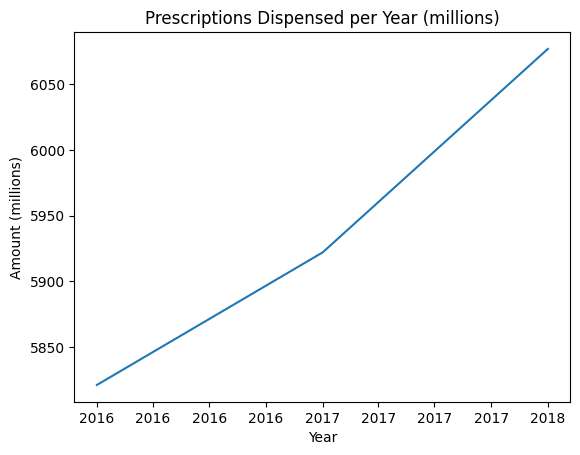

In [32]:
sns.lineplot(x = 'Year', y = 'Amount (millions)', data = prescriptions_dispensed) 
date_formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.xlabel('Year')
plt.ylabel('Amount (millions)')
plt.title('Prescriptions Dispensed per Year (millions)')
plt.show()

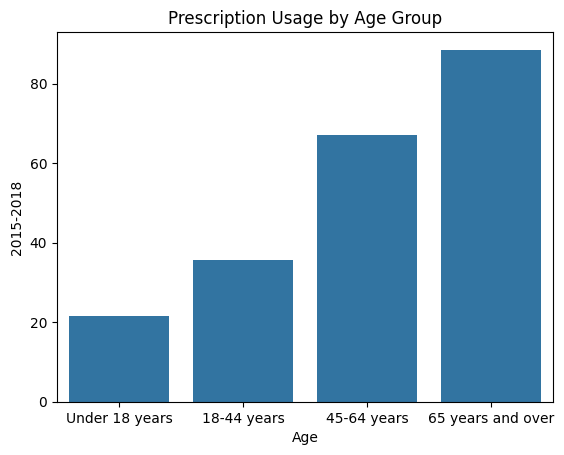

In [33]:
sns.barplot(x = 'Age', y = '2015-2018', data = prescription_usage_with_age)
plt.title('Prescription Usage by Age Group')
plt.show()

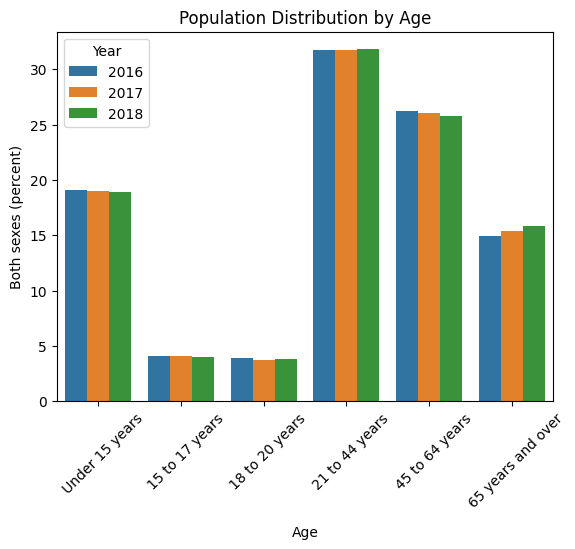

In [34]:
sns.barplot(x = 'Age', y = 'Both sexes (percent)', data = us_population, hue = 'Year')
plt.title('Population Distribution by Age')
plt.xticks(rotation = 45)
plt.show()

In [35]:
# 2023 data to be used after model is built

## Test ydata Package

In [36]:
prescriptions_dispensed_profile = ProfileReport(prescriptions_dispensed, title = 'Prescriptions Dispensed')
prescriptions_dispensed_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00, 232.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
prescription_usage_with_age_profile = ProfileReport(prescription_usage_with_age, title = 'Prescription Usage by Age')
prescription_usage_with_age_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00, 150.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
us_population_profile = ProfileReport(us_population, title = 'U.S. Population Demographics')
us_population_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 7852.66it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
'''
ydata package is good but already did most of the work cleaning in the wrangling stage so insights such as missing values 
and the graphs aren't 100% useful; may be more valuable to combine dataset into one dataframe then run ydata package
'''

"\nydata package is good but already did most of the work cleaning in the wrangling stage so insights such as missing values \nand the graphs aren't 100% useful; may be more valuable to combine dataset into one dataframe then run ydata package\n"

In [40]:
print(prescriptions_dispensed.columns)

Index(['Year', 'Amount (millions)'], dtype='object')


In [41]:
# Format columns so that merge will be seamless

prescriptions_dispensed['Year'] = prescriptions_dispensed['Year'].dt.year

print(prescriptions_dispensed)

   Year  Amount (millions)
7  2016             5821.0
8  2017             5922.0
9  2018             6077.0


In [42]:
print(prescription_usage_with_age.columns)

Index(['Age', '2015-2018'], dtype='object', name=0)


In [43]:
# Format columns so that merge will be seamless
print(prescription_usage_with_age)

prescription_usage_with_age = pd.concat([prescription_usage_with_age, prescription_usage_with_age.iloc[0:4,:].copy()], ignore_index = True)
prescription_usage_with_age = pd.concat([prescription_usage_with_age, prescription_usage_with_age.iloc[0:4,:].copy()], ignore_index = True)

prescription_usage_with_age['Year'] = '2016'
prescription_usage_with_age.iloc[4:8,2] = '2017'
prescription_usage_with_age.iloc[8:12,2] = '2018'

prescription_usage_with_age.rename(columns = {'2015-2018':'Percentage'}, inplace = True)

print(prescription_usage_with_age)

0                Age  2015-2018
1     Under 18 years       21.5
2        18-44 years       35.7
3        45-64 years       67.1
4  65 years and over       88.5
0                 Age  Percentage  Year
0      Under 18 years        21.5  2016
1         18-44 years        35.7  2016
2         45-64 years        67.1  2016
3   65 years and over        88.5  2016
4      Under 18 years        21.5  2017
5         18-44 years        35.7  2017
6         45-64 years        67.1  2017
7   65 years and over        88.5  2017
8      Under 18 years        21.5  2018
9         18-44 years        35.7  2018
10        45-64 years        67.1  2018
11  65 years and over        88.5  2018


In [44]:
print(us_population.columns)

Index(['Age', 'Both sexes (number)', 'Both sexes (percent)', 'Male (number)',
       'Male (percent)', 'Female (number)', 'Female (percent)', 'Year'],
      dtype='object', name=0)


In [45]:
print(us_population)

# Need to adjust for age brackets in prescription dataframe
us_population_adjusted = pd.DataFrame(np.zeros((12,8)), columns = us_population.columns)

us_population_adjusted['Age'] = prescription_usage_with_age['Age']

for i in range(0,12,4):
    j = int(i * 1.5)
    # Under 18 years
    for k in range(1,7):
        us_population_adjusted.iloc[i,k] = us_population.iloc[j,k]+us_population.iloc[j+1,k]

    us_population_adjusted.iloc[i,7] = us_population.iloc[j,7]
    
    # 18-44 years
    for k in range(1,7):
        us_population_adjusted.iloc[i+1,k] = us_population.iloc[j+2,k]+us_population.iloc[j+3,k]

    us_population_adjusted.iloc[i+1,7] = us_population.iloc[j+2,7]
    
    # 45-64 years
    us_population_adjusted.iloc[i+2,1:8] = us_population.iloc[j+4,1:8]
    # 65 years and over
    us_population_adjusted.iloc[i+3,1:8] = us_population.iloc[j+5,1:8]
    
print(us_population_adjusted)

0                    Age  Both sexes (number)  Both sexes (percent)  \
0         Under 15 years                60965                  19.1   
1         15 to 17 years                13097                   4.1   
2         18 to 20 years                12354                   3.9   
3         21 to 44 years               101205                  31.7   
4         45 to 64 years                83701                  26.2   
5      65 years and over                47547                  14.9   
6         Under 15 years                60969                  19.0   
7         15 to 17 years                13078                   4.1   
8         18 to 20 years                11983                   3.7   
9         21 to 44 years               101718                  31.7   
10        45 to 64 years                83351                  26.0   
11     65 years and over                49274                  15.4   
12        Under 15 years                60984                  18.9   
13    

C:\Users\Golden\AppData\Local\Temp\ipykernel_16720\1679561647.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2016' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  us_population_adjusted.iloc[i,7] = us_population.iloc[j,7]


In [46]:
# Combine dataframes

print(us_population_adjusted.shape)
print(prescription_usage_with_age.shape)

# Merge population with prescription usage
mergeddata = us_population_adjusted.merge(prescription_usage_with_age, on = ['Age','Year'])

print(mergeddata)

(12, 8)
(12, 3)
0                 Age  Both sexes (number)  Both sexes (percent)  \
0      Under 18 years              74062.0                  23.2   
1         18-44 years             113559.0                  35.6   
2         45-64 years              83701.0                  26.2   
3   65 years and over              47547.0                  14.9   
4      Under 18 years              74047.0                  23.1   
5         18-44 years             113701.0                  35.4   
6         45-64 years              83351.0                  26.0   
7   65 years and over              49274.0                  15.4   
8      Under 18 years              73963.0                  22.9   
9         18-44 years             114876.0                  35.6   
10        45-64 years              83237.0                  25.8   
11  65 years and over              51080.0                  15.8   

0   Male (number)  Male (percent)  Female (number)  Female (percent)  Year  \
0         37738.0    

In [47]:
# Rename columns for clarity
mergeddata.rename(columns = {'Percentage':'% of Population Using Prescriptions', 'Age':'Age Group'}, inplace = True)

# Calculate person(s) per age group that use prescriptions
mergeddata['Population per Age Group Using Prescriptions'] = mergeddata['Both sexes (number)'] * mergeddata['% of Population Using Prescriptions'].round(0)

# In hindsight, population broken down by sexes isn't 1-to-1 with the prescription usage data; not needed

# Save results per year in different dataframe to be merged with actual data
drugusage = mergeddata.groupby('Year')['Population per Age Group Using Prescriptions'].sum().to_frame()

# Misc formatting steps
drugusage.rename(columns = {'Population per Age Group Using Prescriptions':'Population Using Prescriptions'}, inplace = True)
drugusage.reset_index(inplace = True)

print(drugusage)

   Year  Population Using Prescriptions
0  2016                      15509591.0
1  2017                      15642899.0
2  2018                      15834641.0


In [48]:
# Merge resulting dataframe with prescriptions dispensed
drugusage['Year'] = drugusage['Year'].astype(int)
drugusage = drugusage.merge(prescriptions_dispensed, on = 'Year')

# Rename columns for clarity
drugusage.rename(columns = {'Amount (millions)':'Prescriptions Dispensed (millions)'}, inplace = True)

print(drugusage)

   Year  Population Using Prescriptions  Prescriptions Dispensed (millions)
0  2016                      15509591.0                              5821.0
1  2017                      15642899.0                              5922.0
2  2018                      15834641.0                              6077.0


In [49]:
dataprofile = ProfileReport(drugusage, title = 'U.S. Population Using Prescriptions and Prescription Amount')
dataprofile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00, 194.23it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
# Manually calculate Pearson correlation coefficient for practice
corr = drugusage['Population Using Prescriptions'].corr(drugusage['Prescriptions Dispensed (millions)'], method = 'pearson')

print(corr)

0.9998421443572115


In [51]:
# Features show strong correlation

# Pre-Processing and Training Data Development

In [52]:
# Create dummy/indicator features for categorical variables

# No categorical features remaining, moving onto next step

# For creating dummy/indicator features would use function such as pd.get_dummies()

In [53]:
# Split data into training and test datasets
X = drugusage['Population Using Prescriptions']
y = drugusage['Prescriptions Dispensed (millions)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [60]:
X_train.shape

(2,)

In [64]:
X_train = X_train.values.reshape(-1,1)

X_train.shape

(2, 1)

In [57]:
X_test.shape

(1,)

In [65]:
X_test = X_test.values.reshape(-1,1)

X_test.shape

(1, 1)

In [66]:
# Standardize the magnitude of numeric features using a scaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)